#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import flights table
flights = pd.read_csv('flights.csv', low_memory=False)
flights.shape

(15927485, 42)

In [62]:
# select 100000 random rows to use for testing 
flights_sample = flights.sample(n=100000)

In [63]:
flights_sample = flights_sample[(flights_sample['dep_delay'].isna() != True)] 
flights_sample = flights_sample[(flights_sample['dep_delay'] < 1000)] 
flights_sample = flights_sample[(flights_sample['diverted']!=1) | (flights_sample['cancelled']!=1)]
flights_sample = flights_sample[(flights_sample['arr_delay'].isna() != True)] 
flights_sample = flights_sample[(flights_sample['air_time'].isna() != True)] 

In [64]:
flights_sample['air_speed_mph'] = flights_sample['distance']/(flights_sample['air_time']/60)

### Testing the following hypothesis:
####    H0: mean air speed of delayed flights equals mean air speed of on time flights
####    HA: mean air speed of delayed flights is higher than mean air speed of on time flights

In [65]:
# set the significance level
alpha = 0.05

In [66]:
#split dataframe into delayed flights vs non-delayed flights
delayed_df = flights_sample[flights_sample['dep_delay'] > 0]
on_time_df = flights_sample[flights_sample['dep_delay'] <= 0]

delayed_speed_mean = delayed_df['air_speed_mph'].mean()
on_time_speed_mean = on_time_df['air_speed_mph'].mean()
observed_means_diff = delayed_speed_mean - on_time_speed_mean

print("Average air speed for on time flights (mph):",on_time_speed_mean)
print("Average air speed for on time flights (mph):",on_time_speed_mean)

Average air speed for on time flights (mph): 395.67397866244414
Average air speed for on time flights (mph): 395.67397866244414


In [67]:
delayed_df = delayed_df['air_speed_mph']
on_time_df = on_time_df['air_speed_mph']

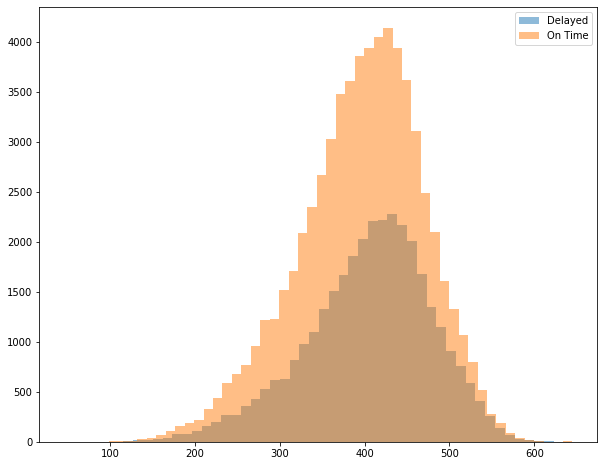

In [77]:
plt.figure(figsize=(10,8))
plt.hist(delayed_df,bins=50, label='Delayed', alpha=0.5)
plt.hist(on_time_df,bins=50, label='On Time', alpha=0.5)
plt.legend()
plt.show()

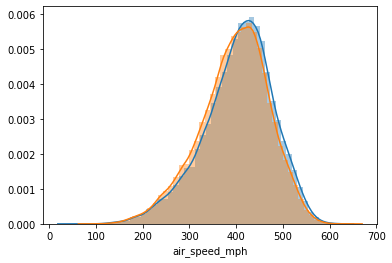

In [80]:
import seaborn as sns
sns.distplot(delayed_df)
sns.distplot(on_time_df);

In [68]:
n = 5000

df = np.concatenate((delayed_df, on_time_df))

# create an empty list to store the permutation replicates means
perm_repl_means = []

for i in range(n):
    # permutation
    speed_perm = np.random.permutation(df)
    
    # permutation replicates
    delayed_perm = speed_perm[:delayed_df.shape[0]]
    on_time_perm = speed_perm[delayed_df.shape[0]:]
    
    # permutation replicates mean
    perm_repl_mean = delayed_perm.mean() - on_time_perm.mean()
    
    # append perm_repl_mean to list
    perm_repl_means.append(perm_repl_mean)


In [69]:
# compute the p-value
p = np.sum(np.abs(perm_repl_means) >= observed_means_diff) / len(perm_repl_means)

# print the result
print('p-value =', p)

# final decision
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p-value = 0.0
Reject null hypothesis


In [70]:
# try two sided T-test

from scipy.stats import ttest_ind

delayed_mean = np.mean(delayed_df)
on_time_mean = np.mean(on_time_df)
print("Delayed mean value:",delayed_mean)
print("On time mean value:",on_time_mean)

delayed_std = np.std(delayed_df)
on_time_std = np.std(on_time_df)

print("delayed std value:",delayed_std)
print("on_time std value:",on_time_std)

ttest,pval = ttest_ind(delayed_df,on_time_df)
print("p-value",pval)
if pval <0.05:
  print("Reject null hypothesis")
else:
  print("Accept null hypothesis")

Delayed mean value: 404.37384078732896
On time mean value: 395.67397866244414
delayed std value: 74.64080693500104
on_time std value: 74.12573010730324
p-value 2.1356790770122998e-67
Reject null hypothesis


### The difference in air speeds between a delayed flight and an on time flight is significantly significant
### Planes fly faster when they depart late

In [71]:
# try two sided Z-Test

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(delayed_df, x2=on_time_df, value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.6919440846148383e-67
reject null hypothesis
